In [1]:
import numpy as np
from scipy.optimize import minimize
from POD.crystal_structure import CrystalStructure
from POD.utils import calculate_characteristics, error_bb, error_ab, calculate_energy_sol, nrg
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 9)

In [2]:
EPS = 10e-6
dim = 3
A1 = 0.0
A0 = 0.1028
KSI = 1.178
P = 10.928
Q = 3.139
R0 = 2.889
identity_matrix = np.array([1., 0, 0, 0, 1., 0, 0, 0, 1.])
l, r = 0, 10

In [3]:
B_B = CrystalStructure(dim)
B_B.face_centred_cubic("Ag")

In [4]:
while r - l > EPS:
    m0 = l + (r - l) / 3
    m1 = r - (r - l) / 3

    e0 = B_B.calculate_energy(m0 * identity_matrix, A1, A0, KSI, P, Q, R0)
    e1 = B_B.calculate_energy(m1 * identity_matrix, A1, A0, KSI, P, Q, R0)

    if e0 > e1:
        l = m0
    else:
        r = m1

In [5]:
e_coh = B_B.calculate_energy(m0 * identity_matrix, A1, A0, KSI, P, Q, R0) / B_B.get_size()
print(m0, e_coh)

4.085669527854498 -2.9603006739221542


In [6]:
b, c11, c12, c44 = calculate_characteristics(m0, dim, e_coh, A1, A0, KSI, P, Q, R0)

In [7]:
print("b:   ", b, "\nc11: ", c11, "\nc12: ", c12, "\nc44: ", c44)

b:    1.083687285251602 
c11:  1.3173652845889634 
c12:  0.966842886004443 
c44:  0.5067404891334153


In [8]:
params = []
params.append(np.random.uniform(0., 0.025)) # A1 - 0
params.append(np.random.uniform(0.08, 0.12)) # A0 - 0.1028
params.append(np.random.uniform(1.1, 1.2)) # ksi - 1.178
params.append(np.random.uniform(10.8, 11.1)) # p - 10.928
params.append(np.random.uniform(3.1, 3.2)) # q - 3.139
params.append(np.random.uniform(2.7, 2.9)) # r0 - 2.889

In [9]:
bounds = ([0., 0.025], [0.08, 0.12], [1.1, 1.2], [10.8, 11.1], [3.1, 3.2], [2.7, 2.9])

In [10]:
parameters = minimize(error_bb, params, args=(dim, m0, e_coh), method='Nelder-Mead', bounds=bounds, options={'maxiter':1000, 'disp': True})

In [11]:
parameters.x

In [12]:
e_b = B_B.calculate_energy(m0 * identity_matrix, A1, A0, KSI, P, Q, R0)

In [13]:
parameters = minimize(error_ab, params, args=(dim, m0, A1, A0, KSI, P, Q, R0, e_coh, e_b), method='Nelder-Mead',
                      options={'maxiter':1000, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 120
         Function evaluations: 214


In [35]:
parameters.x

array([ 0.022152  ,  0.12717538,  0.65584694, 11.02393728,  3.24396901,
        3.18767035])

In [34]:
e_coh_a = 4.10
A_B = CrystalStructure(dim)
A_B.face_centred_cubic("Ag")
A_B.change_atom("Cr")
e_ab = A_B.calculate_energy(m0 * identity_matrix, A1, A0, KSI, P, Q, R0, parameters.x)
print(calculate_energy_sol(e_coh_a, e_coh, e_b, e_ab))

0.8809843238437227


In [32]:
list_rij = []
list_nrg = []
list_nr = []
rij = 0.1

while rij <= 8:
    list_rij.append(rij)
    list_nrg.append(nrg(rij, [A1, A0, KSI, P, Q, R0]))
    list_nr.append(nrg(rij, parameters.x))
    rij += 0.1

(-2.0, 8.0)

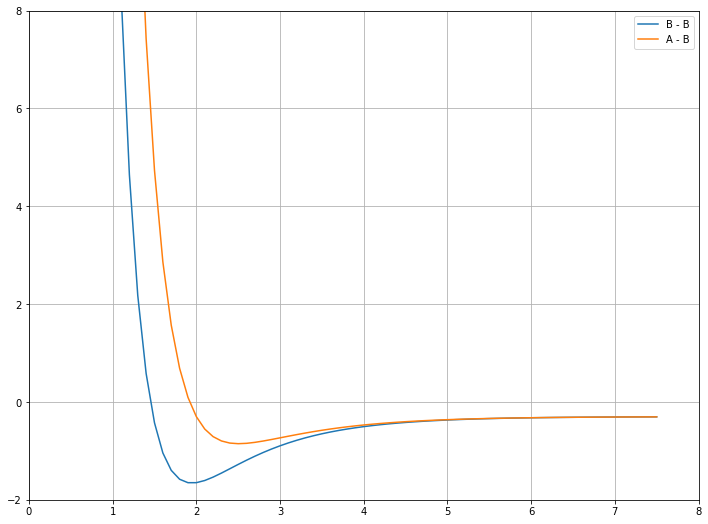

In [33]:
plt.plot(list_rij, list_nrg, label='B - B')
plt.plot(list_rij, list_nr, label='A - B')
plt.legend()
plt.grid()
plt.xlim(0, 8)
plt.ylim(-2, 8)